In [2]:
import healpy as hp
import numpy as np
import os
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = 'COM_CMB_IQU-smica_2048_R3.00_full.fits'
cmb_map = hp.read_map(filename)

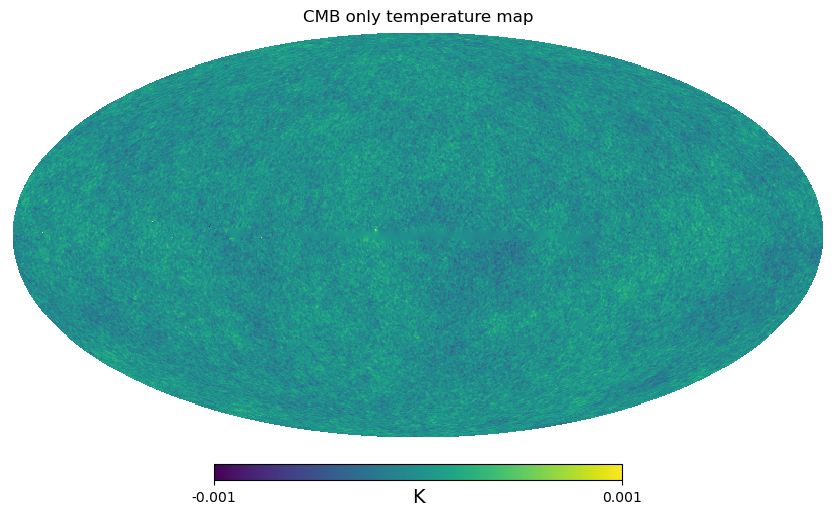

In [4]:
hp.mollview(cmb_map, min=-1e-3, max=1e-3, title="CMB only temperature map", unit="K")

In [5]:
path = 'COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits'
mask = hp.read_map(path)
map_masked = hp.ma(cmb_map)
map_masked.mask = np.logical_not(mask)

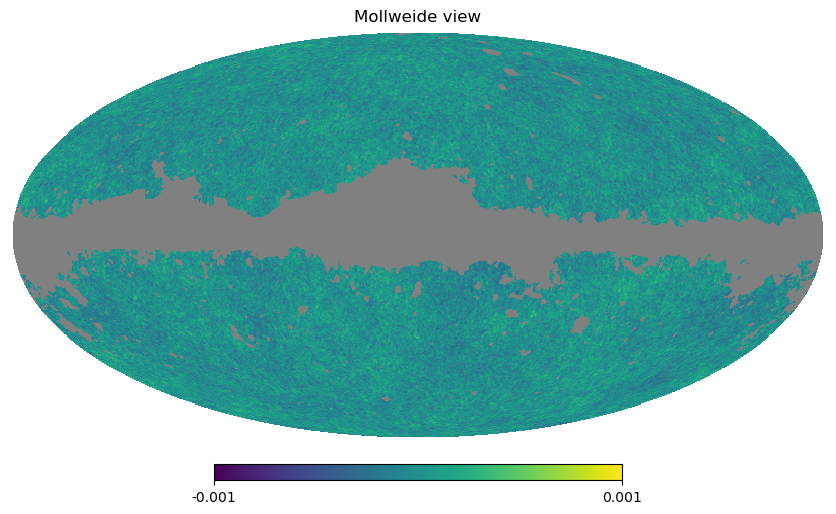

In [6]:
hp.mollview(map_masked, min=-1e-3, max=1e-3)

In [7]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

--2022-11-30 18:13:15--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7143 (7.0K) [text/plain]
Saving to: ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt.9’

COM_PowerSpect_CMB- 100%[===================>]   6.98K  --.-KB/s    in 0s      

2022-11-30 18:13:15 (20.2 MB/s) - ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt.9’ saved [7143/7143]



In [8]:
!head -3 COM_PowerSpect_CMB-TT-binned_R3.01.txt

# l                Dl               -dDl             +dDl             BestFit          
  4.77112240e+01   1.47933552e+03   5.07654876e+01   5.07654876e+01   1.46111304e+03
  7.64716065e+01   2.03496833e+03   5.47101576e+01   5.47101576e+01   2.06238073e+03


In [9]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [10]:
lmax = 3000

In [11]:
test_cls_meas_frommap = hp.anafast(map_masked, lmax=lmax, use_pixel_weights=True)

In [12]:
ll = np.arange(lmax+1)

In [13]:
sky_fraction = len(map_masked.compressed()) / len(map_masked)

In [14]:
map_masked

masked_array(data=[-0.00012349987810011953, -9.279615187551826e-05,
                   -6.396187382051721e-05, ..., 0.00010377157013863325,
                   8.618232823209837e-05, 8.651505049783736e-05],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-1.6375e+30,
            dtype=float32)

In [15]:
print(f"The map covers {sky_fraction:.1%} of the sky")

The map covers 77.9% of the sky


In [16]:
plt.style.use("seaborn-poster")

In [17]:
k2muK = 1e6

(2.0, 300.0)

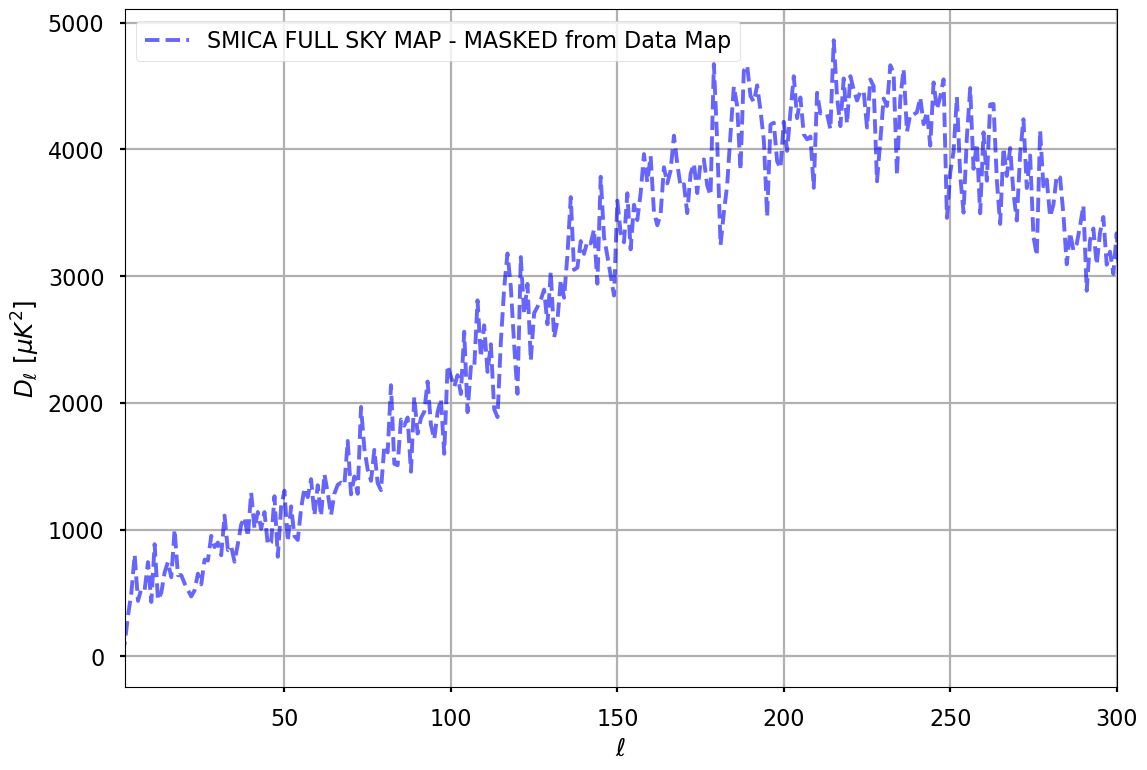

In [46]:
#plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='SMICA FULL SKY MAP - MASKED release')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi , '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map', c='blue')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')
plt.xlim(2,300)

(2.0, 300.0)

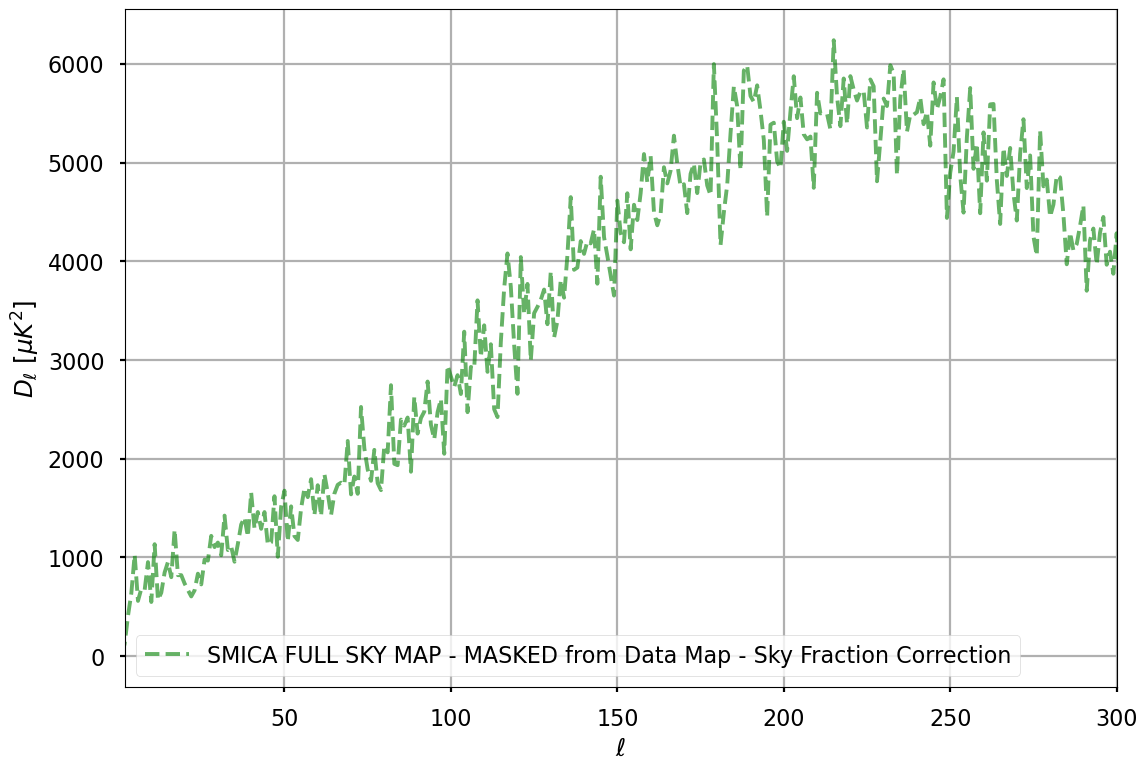

In [49]:
# plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='SMICA FULL SKY MAP - FULL release')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map - Sky Fraction Correction', c='green')
#plt.plot(ll, test,ls='--', alpha=0.6, label='SMICA FULL SKY MAP from Data Map',c='red')
# including the above line will plot the masked vs unmasked map
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')
plt.xlim(2,300)

(2.0, 300.0)

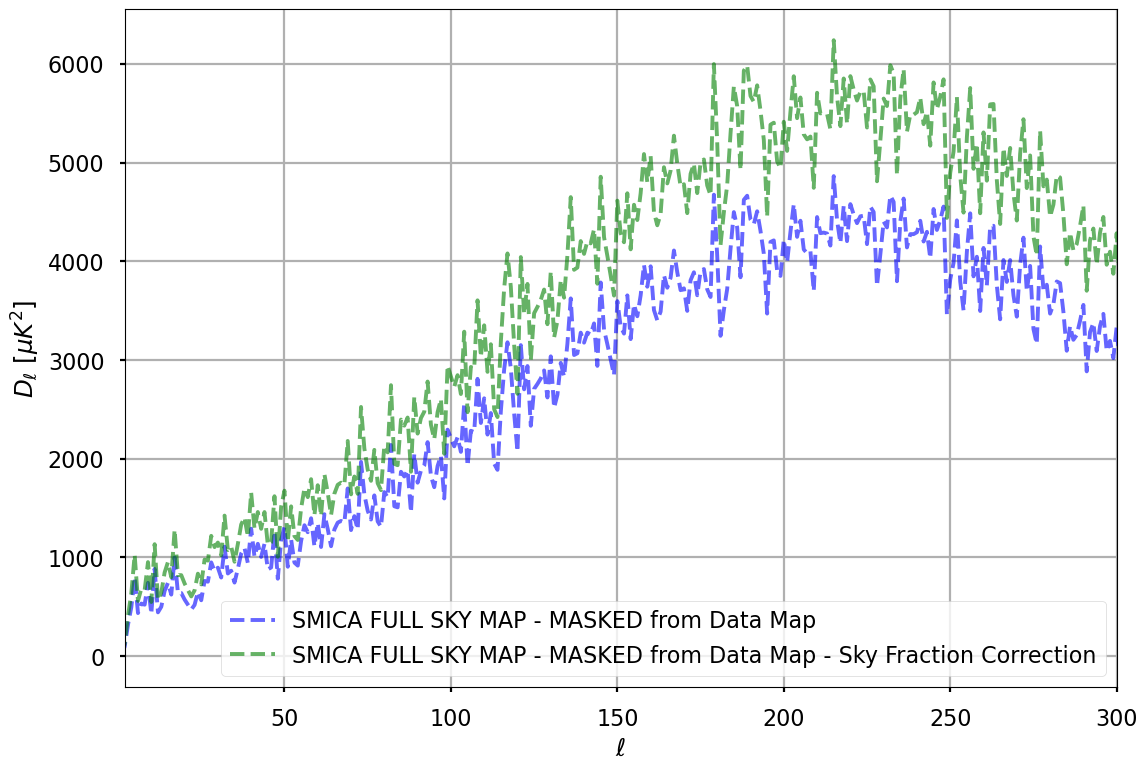

In [50]:
#plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='SMICA FULL SKY MAP - MASKED release')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi , '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map', c='blue')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map - Sky Fraction Correction', c='green')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')
plt.xlim(2,300)

In [38]:
test = np.loadtxt('ll_full.txt')

(2.0, 300.0)

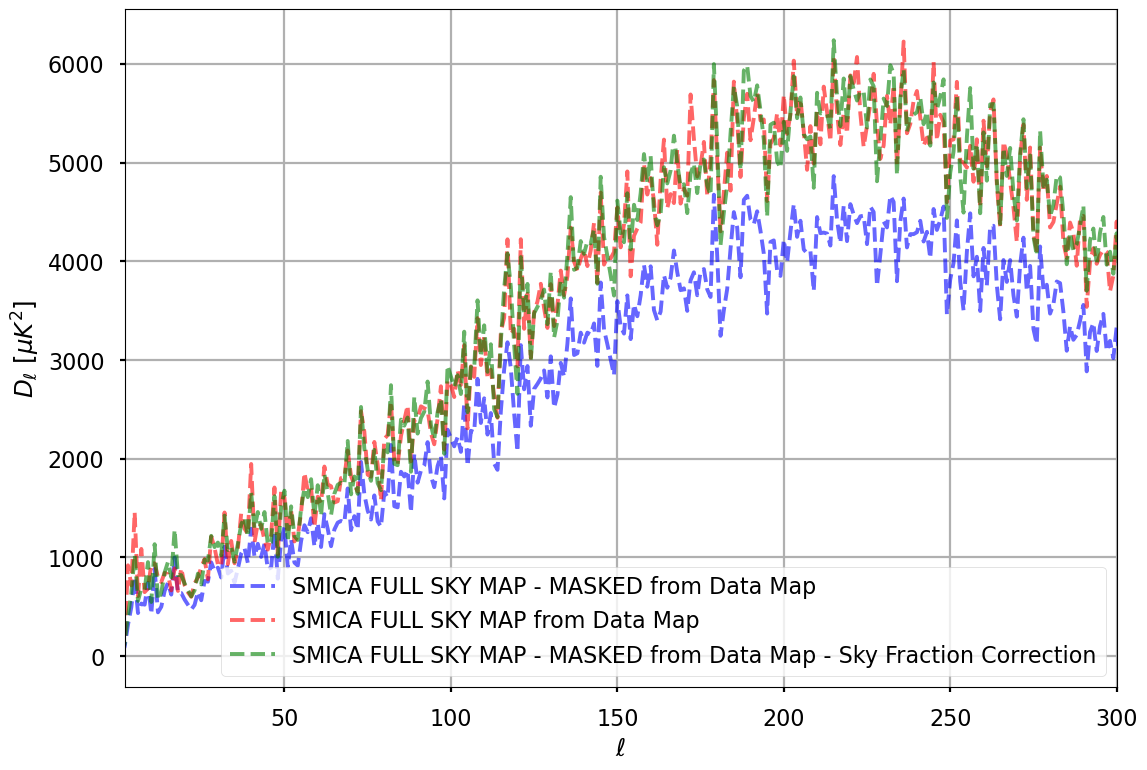

In [52]:
#plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='SMICA FULL SKY MAP - MASKED release')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi , '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map', c='blue')
plt.plot(ll, test , '--', alpha=0.6, label='SMICA FULL SKY MAP from Data Map', c='red')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction, '--', alpha=0.6, label='SMICA FULL SKY MAP - MASKED from Data Map - Sky Fraction Correction', c='green')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')
plt.xlim(2,300)